Instalace potřebných knihoven

In [1]:
%pip install pandas
%pip install matplotlib
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



Data načteme a zobrazíme

In [2]:
import pandas as pd

data_co = pd.read_csv("dataCoGES.csv", sep=";")
data_ref = pd.read_csv("dataRefGES.csv", sep=";")

data_ref

,energie,0,1,10,20,30,40,50,60
0,20.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,19.609000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,19.225000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,18.848000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,18.480000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...
497,0.001082,0.000403,9.201500e-14,2.019600e-19,1.765800e-23,1.543900e-27,1.349900e-31,1.180200e-35,1.031900e-39
498,0.001061,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
499,0.001040,0.000135,2.342800e-09,1.217100e-20,9.672000e-25,8.456400e-29,7.393600e-33,6.464400e-37,5.652000e-41
500,0.001020,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Ze sloupce energie vytvoříme indexy

In [3]:
for data in [data_ref, data_co]:
    data.index = data["energie"]
    del data["energie"]

data_ref

,0,1,10,20,30,40,50,60
energie,,,,,,,,
20.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
19.609000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
19.225000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
18.848000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
18.480000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
0.001082,0.000403,9.201500e-14,2.019600e-19,1.765800e-23,1.543900e-27,1.349900e-31,1.180200e-35,1.031900e-39
0.001061,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
0.001040,0.000135,2.342800e-09,1.217100e-20,9.672000e-25,8.456400e-29,7.393600e-33,6.464400e-37,5.652000e-41


Sloupec energie jsou popisky osy x, sloupce 0, 1... atd. jsou hodnoty naměřené za daný počet let.

Nyní vytvoříme grafy.

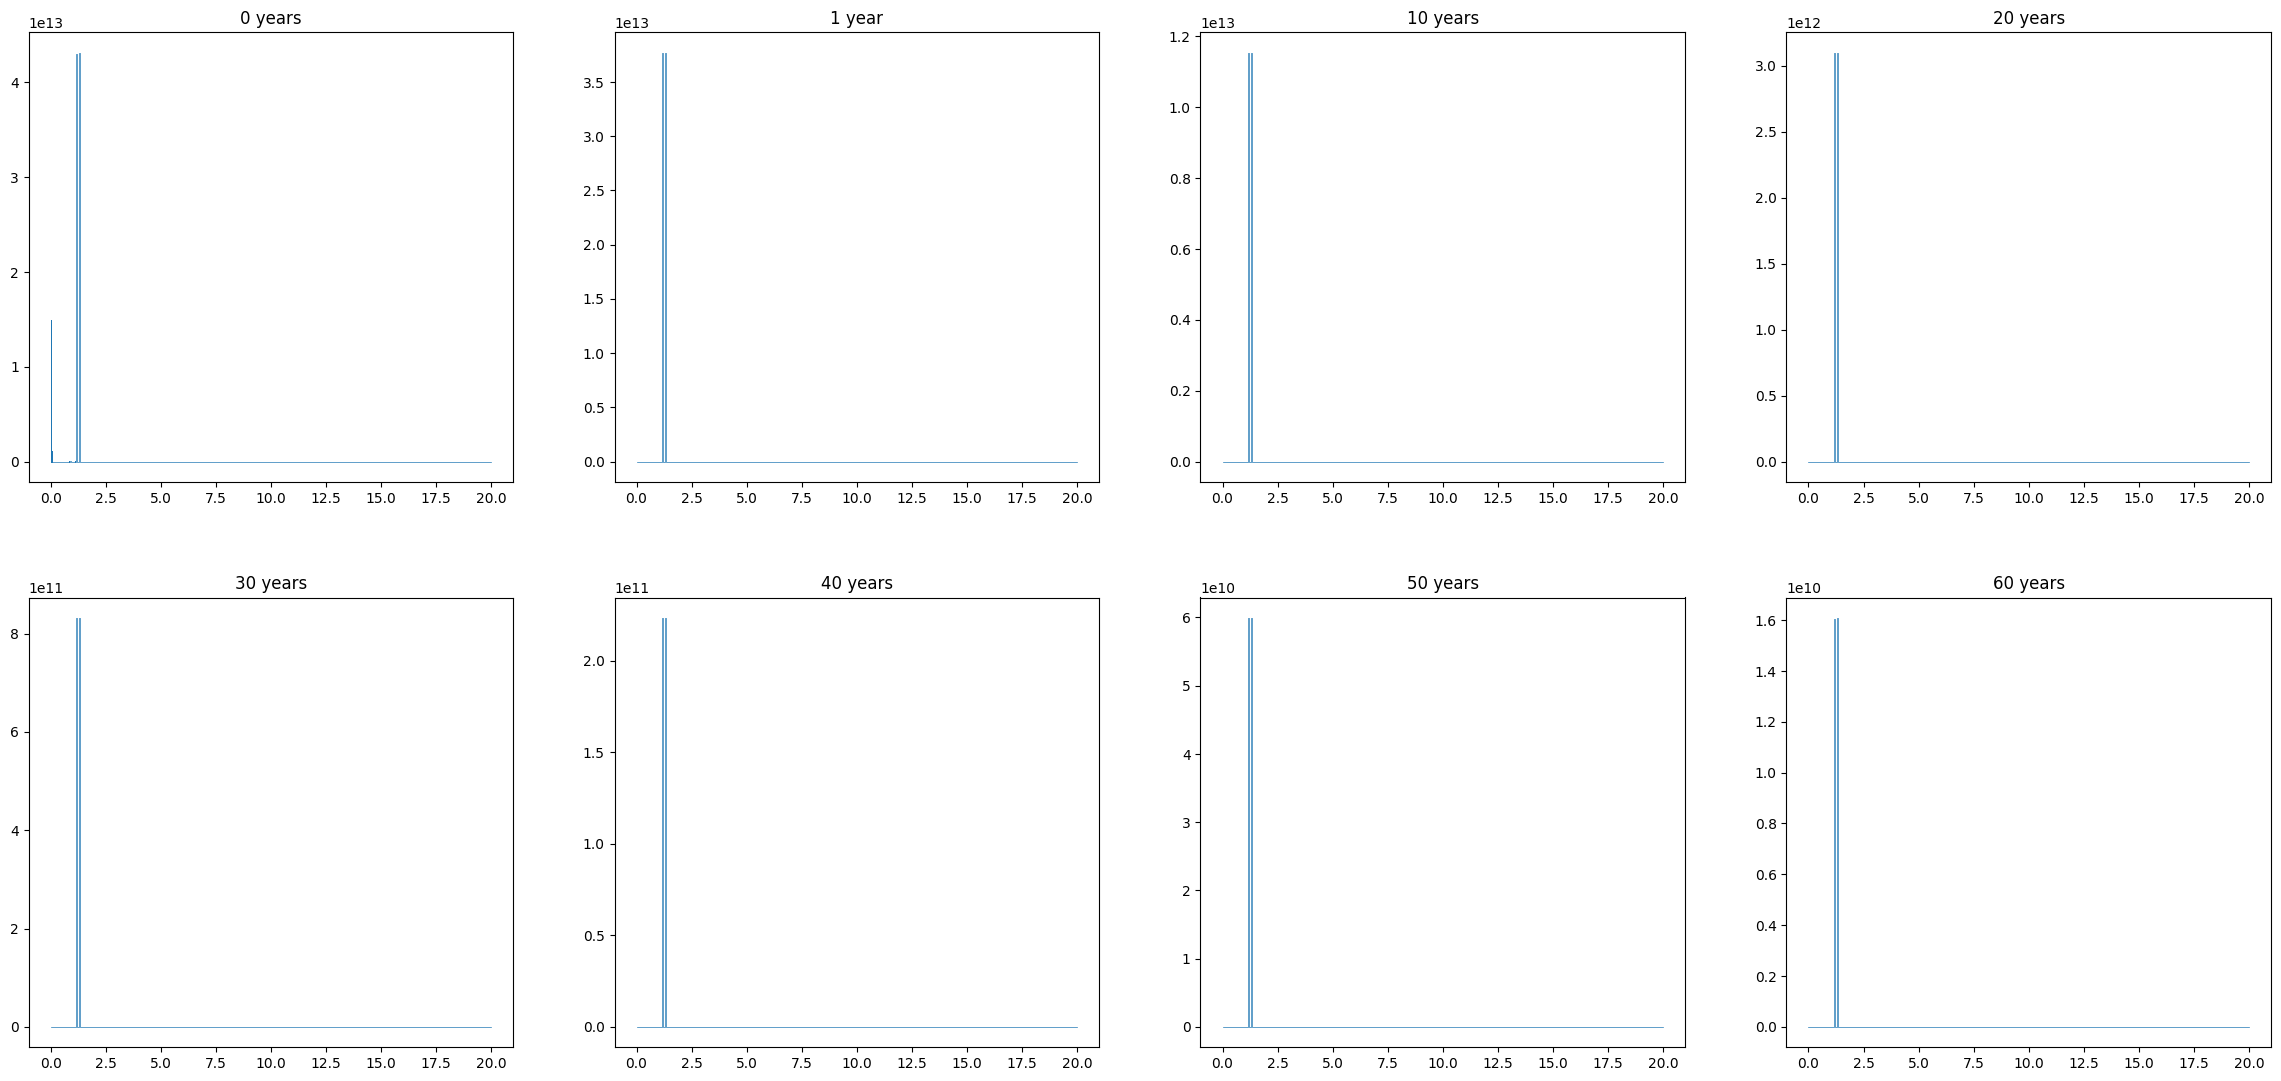

In [4]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24,12))

x = data_ref.index

def y(years):
    y1 = data_co[str(years)]
    y2 = data_ref[str(years)]
    return y1 - y2


for i, ax in enumerate(axes.flat):
    years = data_ref.columns[i]
    s = ' year' if years == '1' else ' years'
    ax.set_title(years + s)
    ax.step(x, y(years), linewidth=0.5)

fig.tight_layout(pad=5)

Upravíme osu y na symetricky logaritmickou, pro vykreslení většího počtu dat

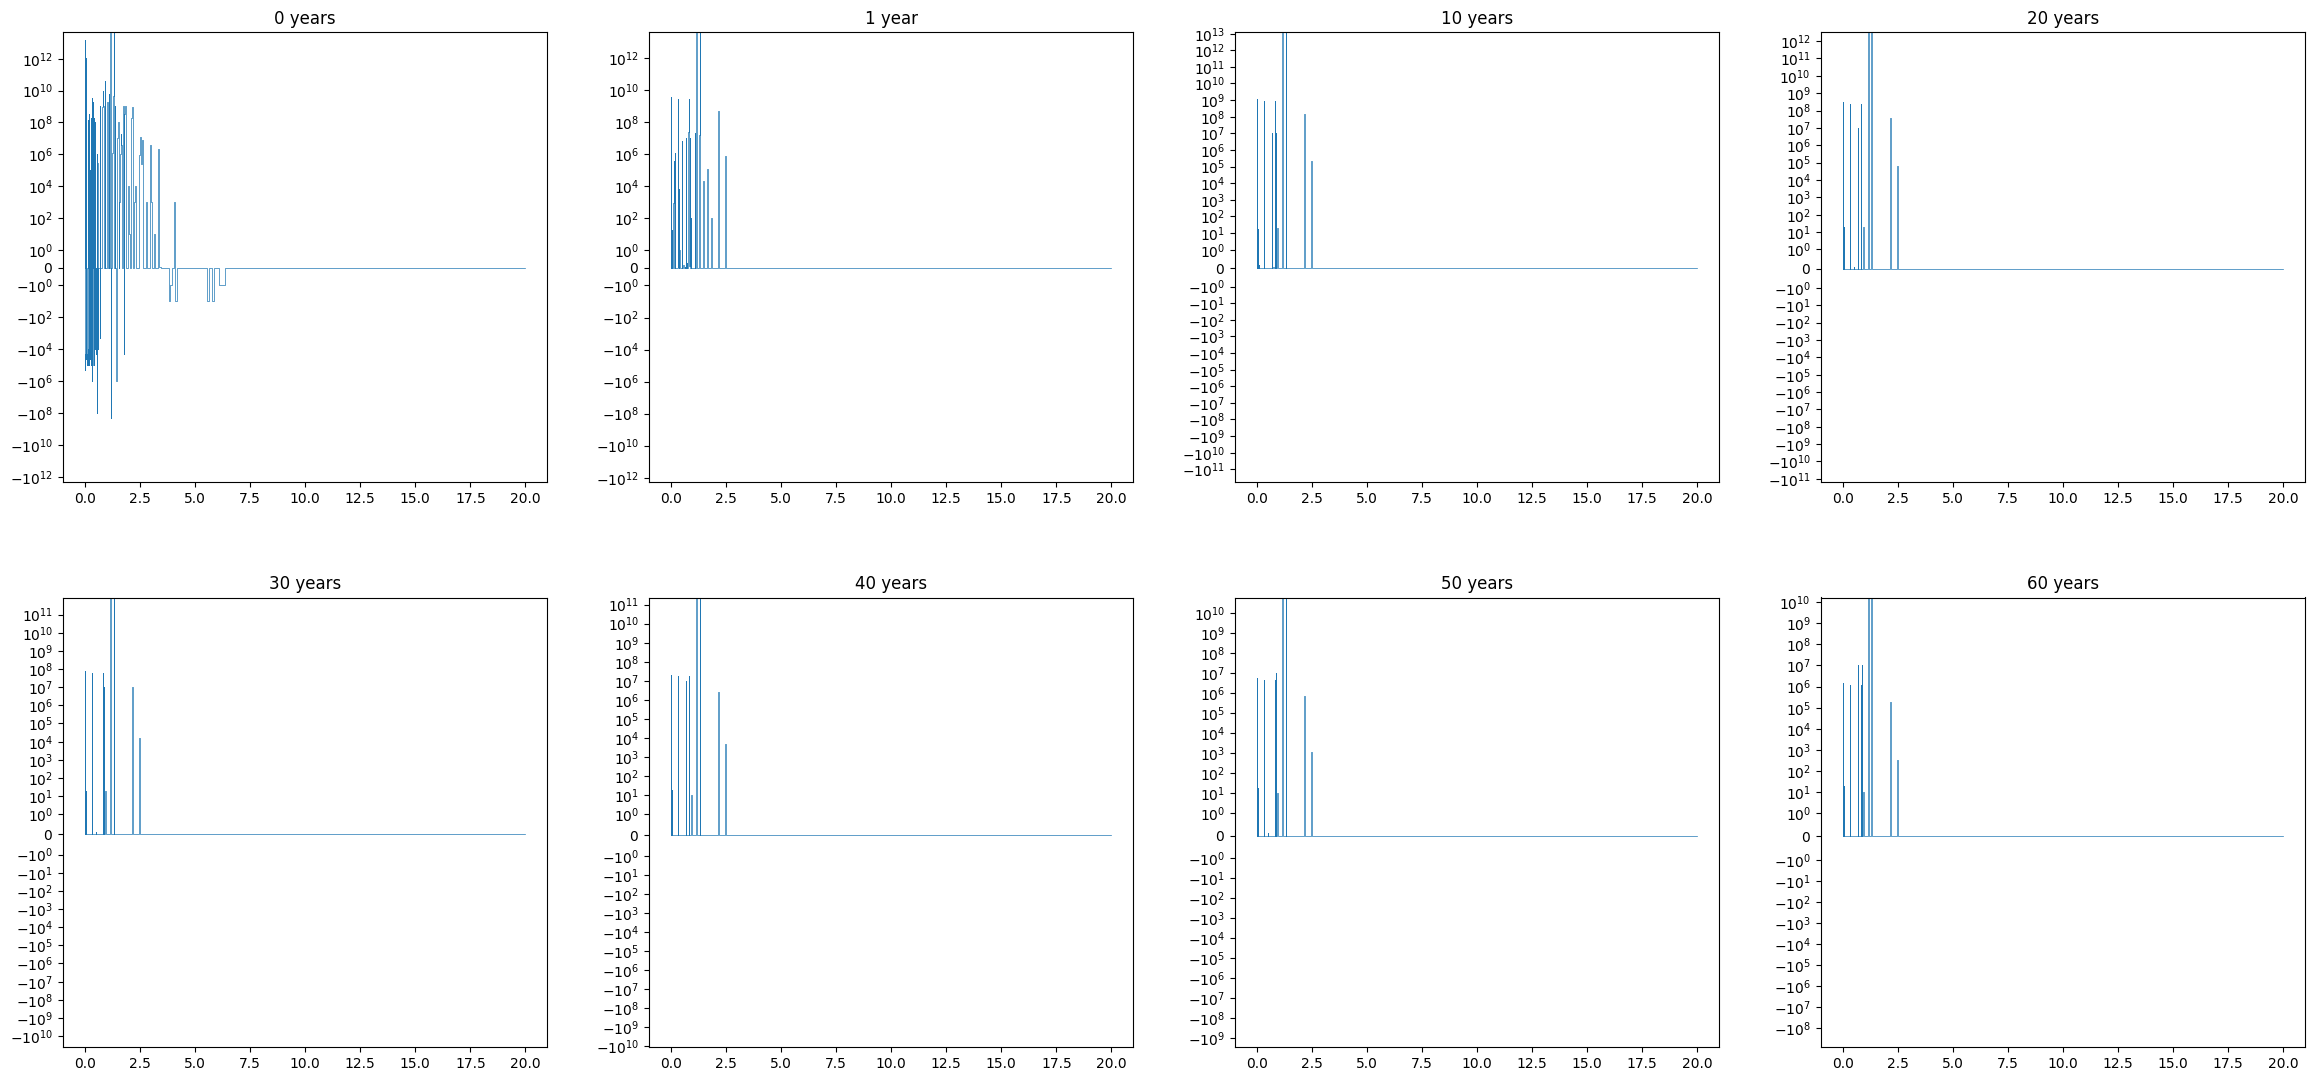

In [5]:
for ax in axes.flat:
    ax.set_yscale('symlog', linthresh=1)
    
fig

Nastavíme pevně krajní meze a značky

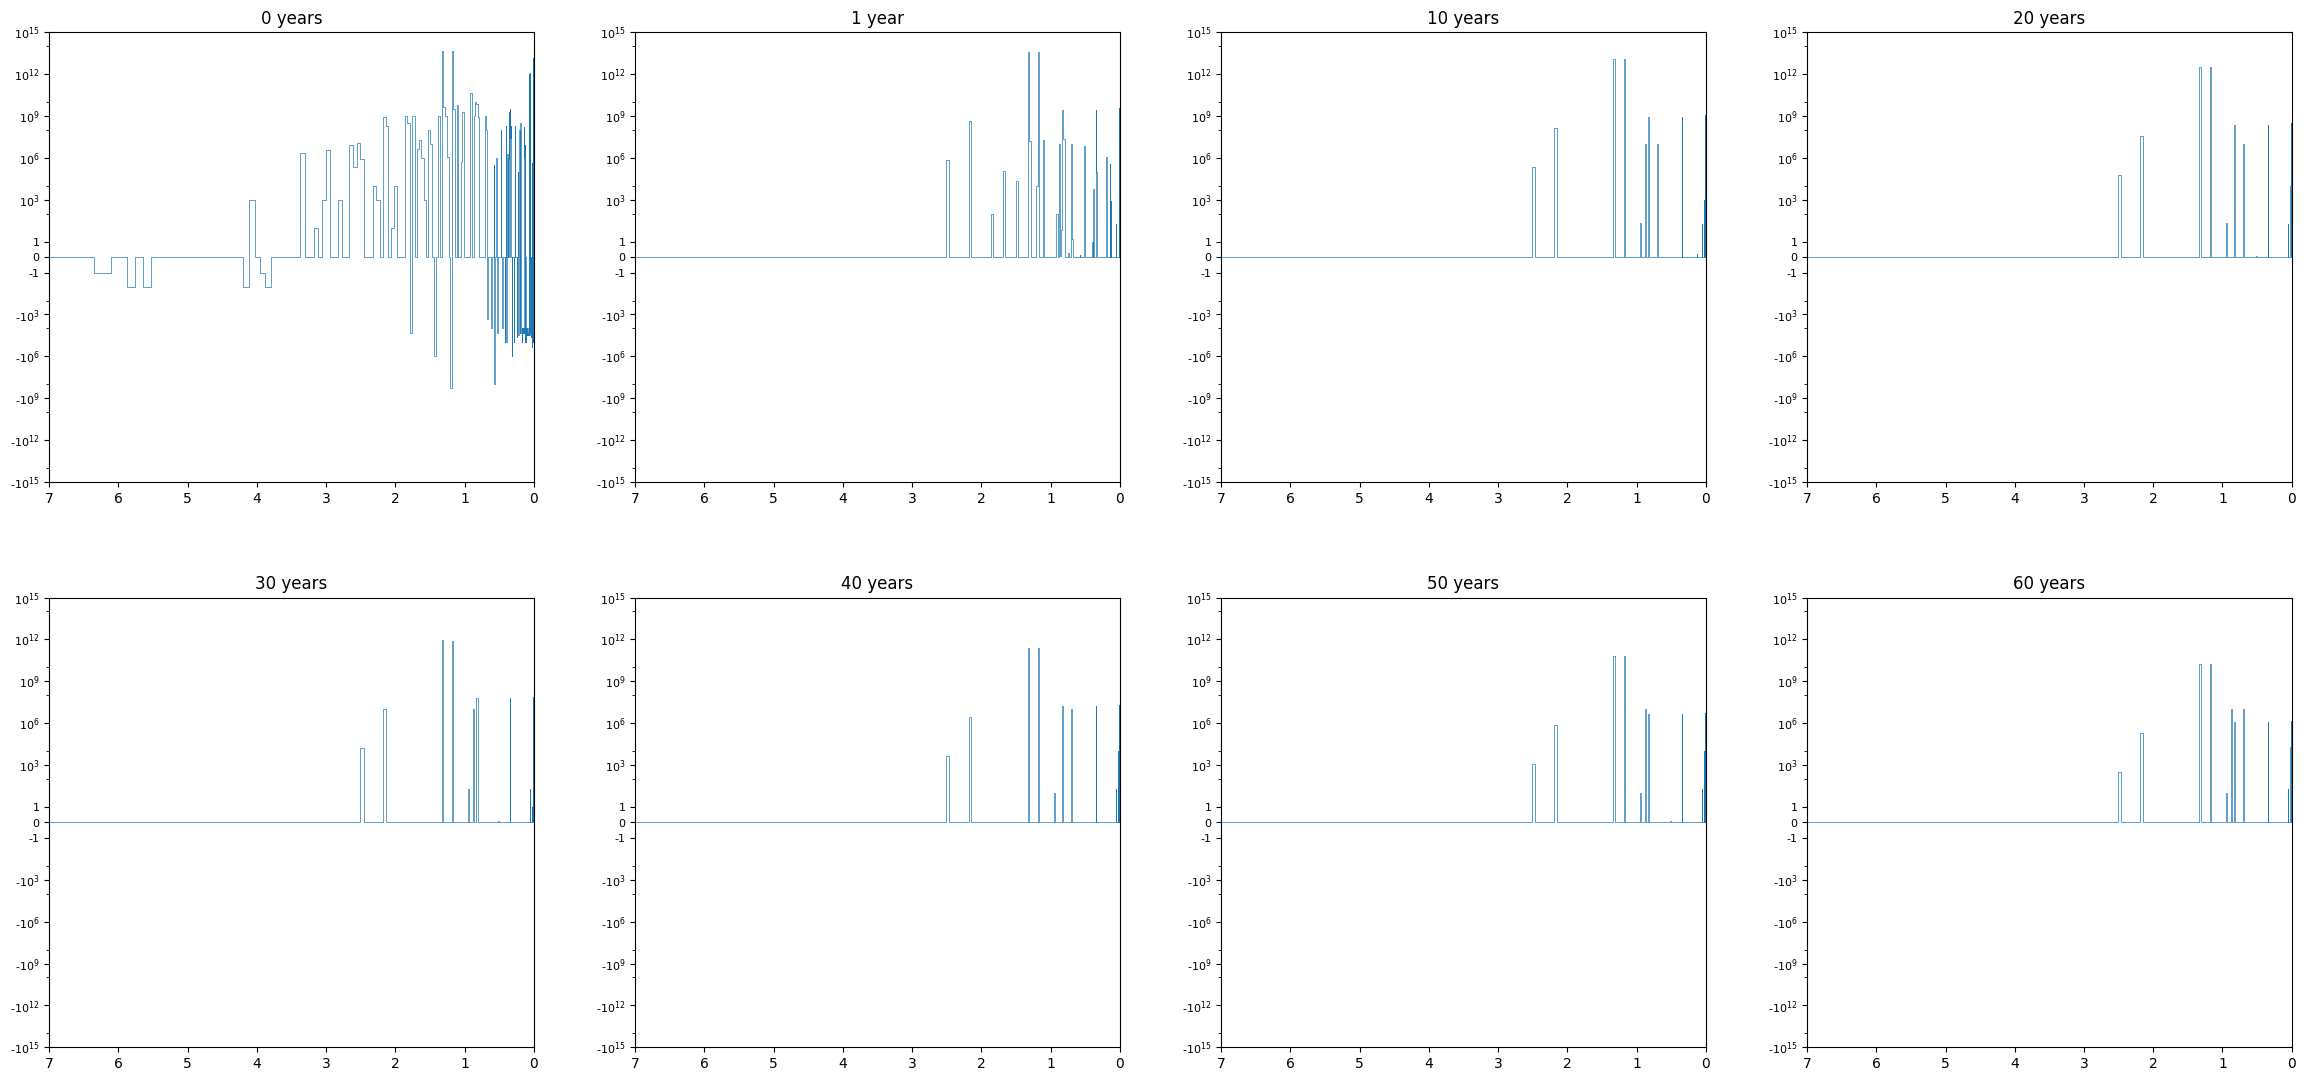

In [6]:
import matplotlib.ticker as ticker
import numpy as np

for i, ax in enumerate(axes.flat):
    ax.set_ylim([-1e15, 1e15])
    ax.set_xlim([7, 0])
    
    tick_locs = [-1, 1]
    tick_labels = ['-1', '1']

    tick_locs += [np.float_power(10, j) * k for j in range(3, 17, 3) for k in [-1, 1]]
    tick_labels += [f'{k}10' + r'$^{' + f'{j}' + r'}$' for j in range(3, 17, 3) for k in ['-', '']]

    tick_locs.append(0)
    tick_labels.append('0')

    formatter = ticker.FixedFormatter(tick_labels)
    ax.yaxis.set_major_locator(ticker.FixedLocator(tick_locs))
    ax.yaxis.set_major_formatter(ticker.FixedFormatter(tick_labels))
    ax.tick_params(axis='y', labelsize=8)
    

fig


Nastavíme osu x na logaritmickou a vytvoříme vlastní značky

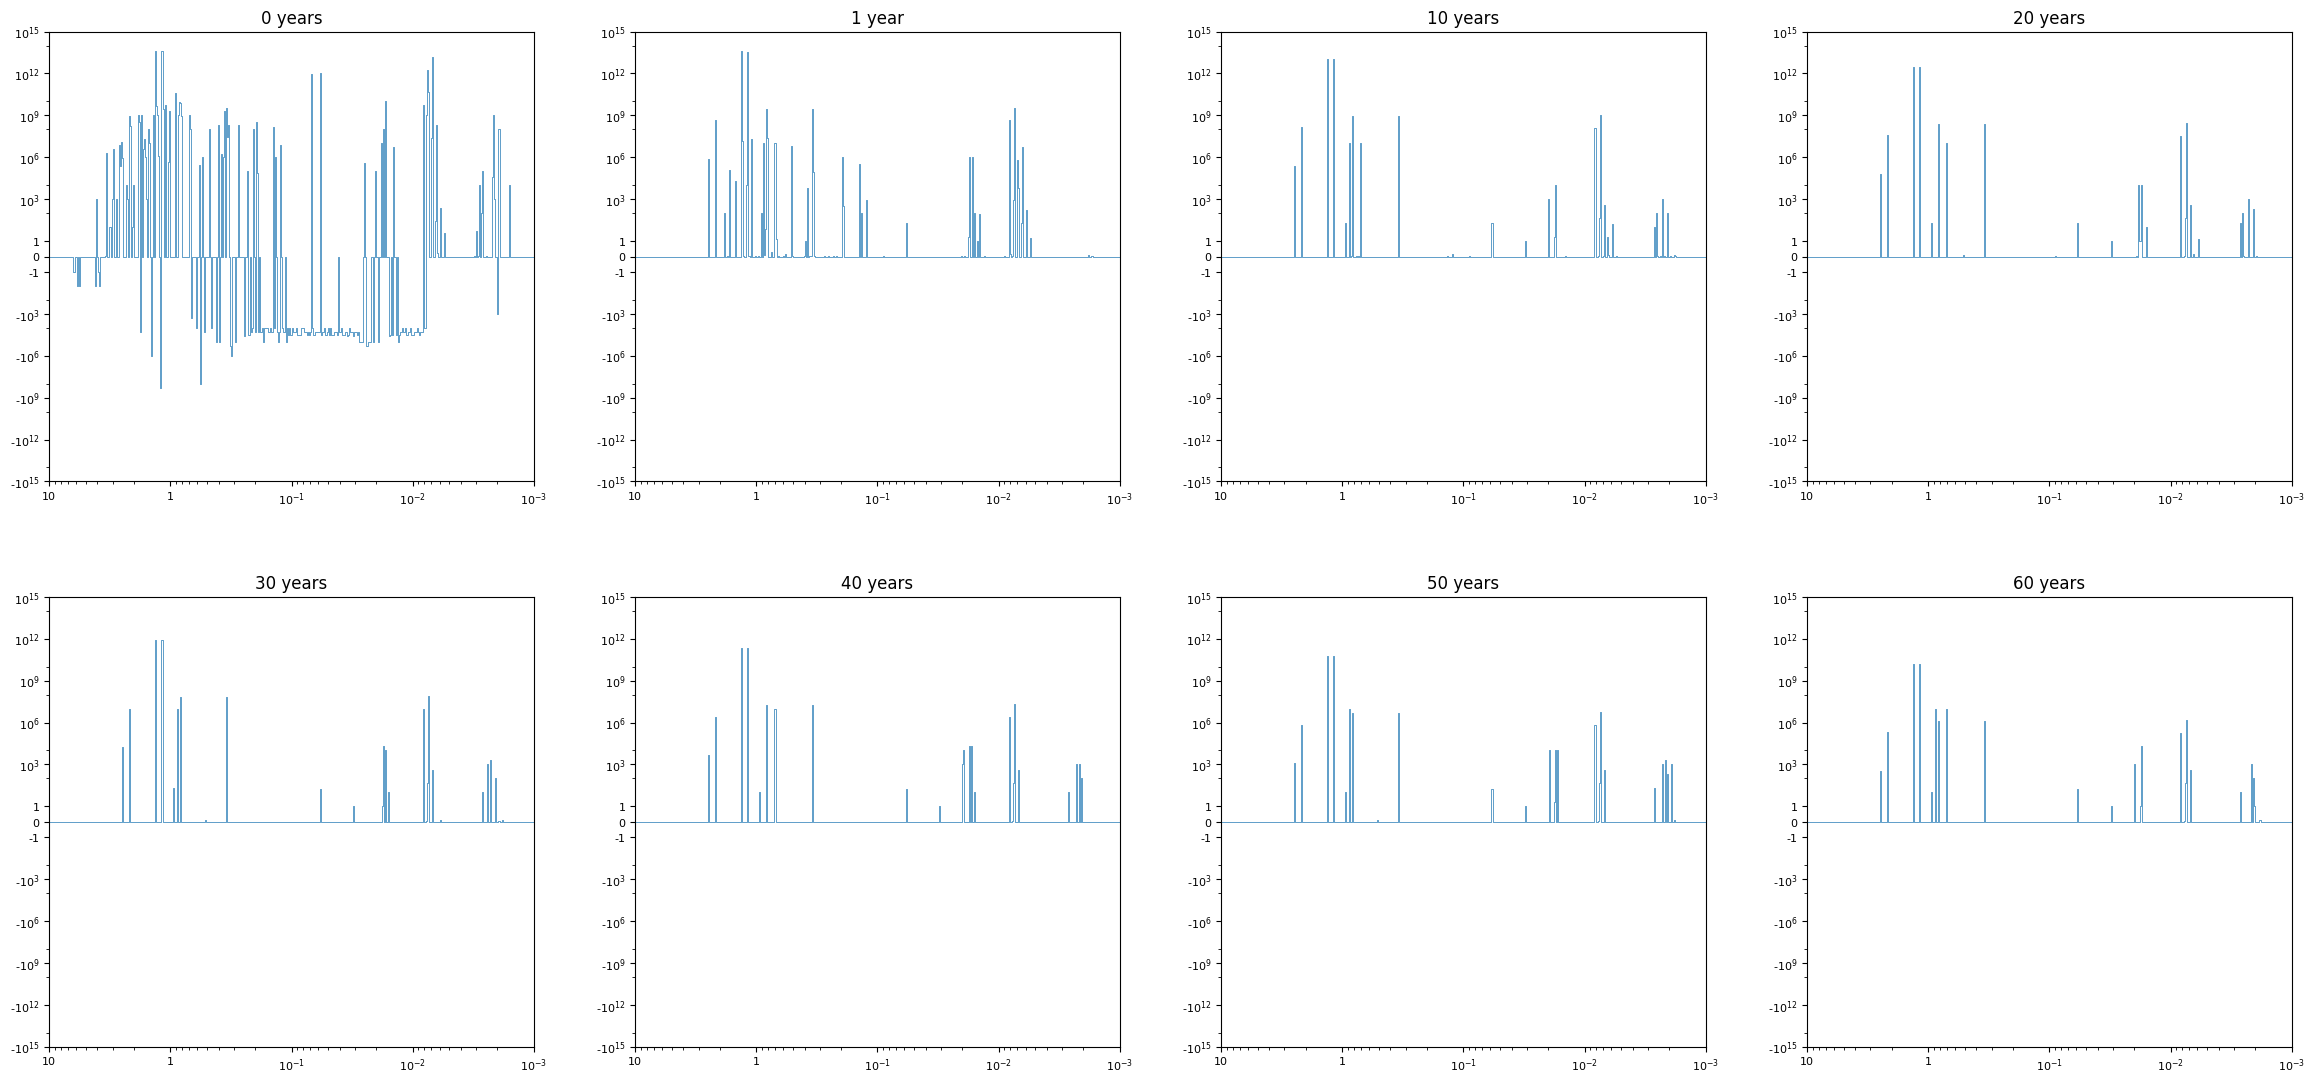

In [7]:
for ax in axes.flat:
    ax.set_xscale('log')
    ax.set_xlim([10, 1e-3])

    tick_locs = [10, 1]
    tick_labels = ['10', '1']

    tick_locs += [np.float_power(10, j) for j in range(-3, 0)]
    tick_labels += ['10' + r'$^{' + f'{j}' + r'}$' for j in range(-3, 0)]

    formatter = ticker.FixedFormatter(tick_labels)
    ax.xaxis.set_major_locator(ticker.FixedLocator(tick_locs))
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(tick_labels))
    ax.tick_params(axis='x', labelsize=8)

fig

Nastavíme popisky os

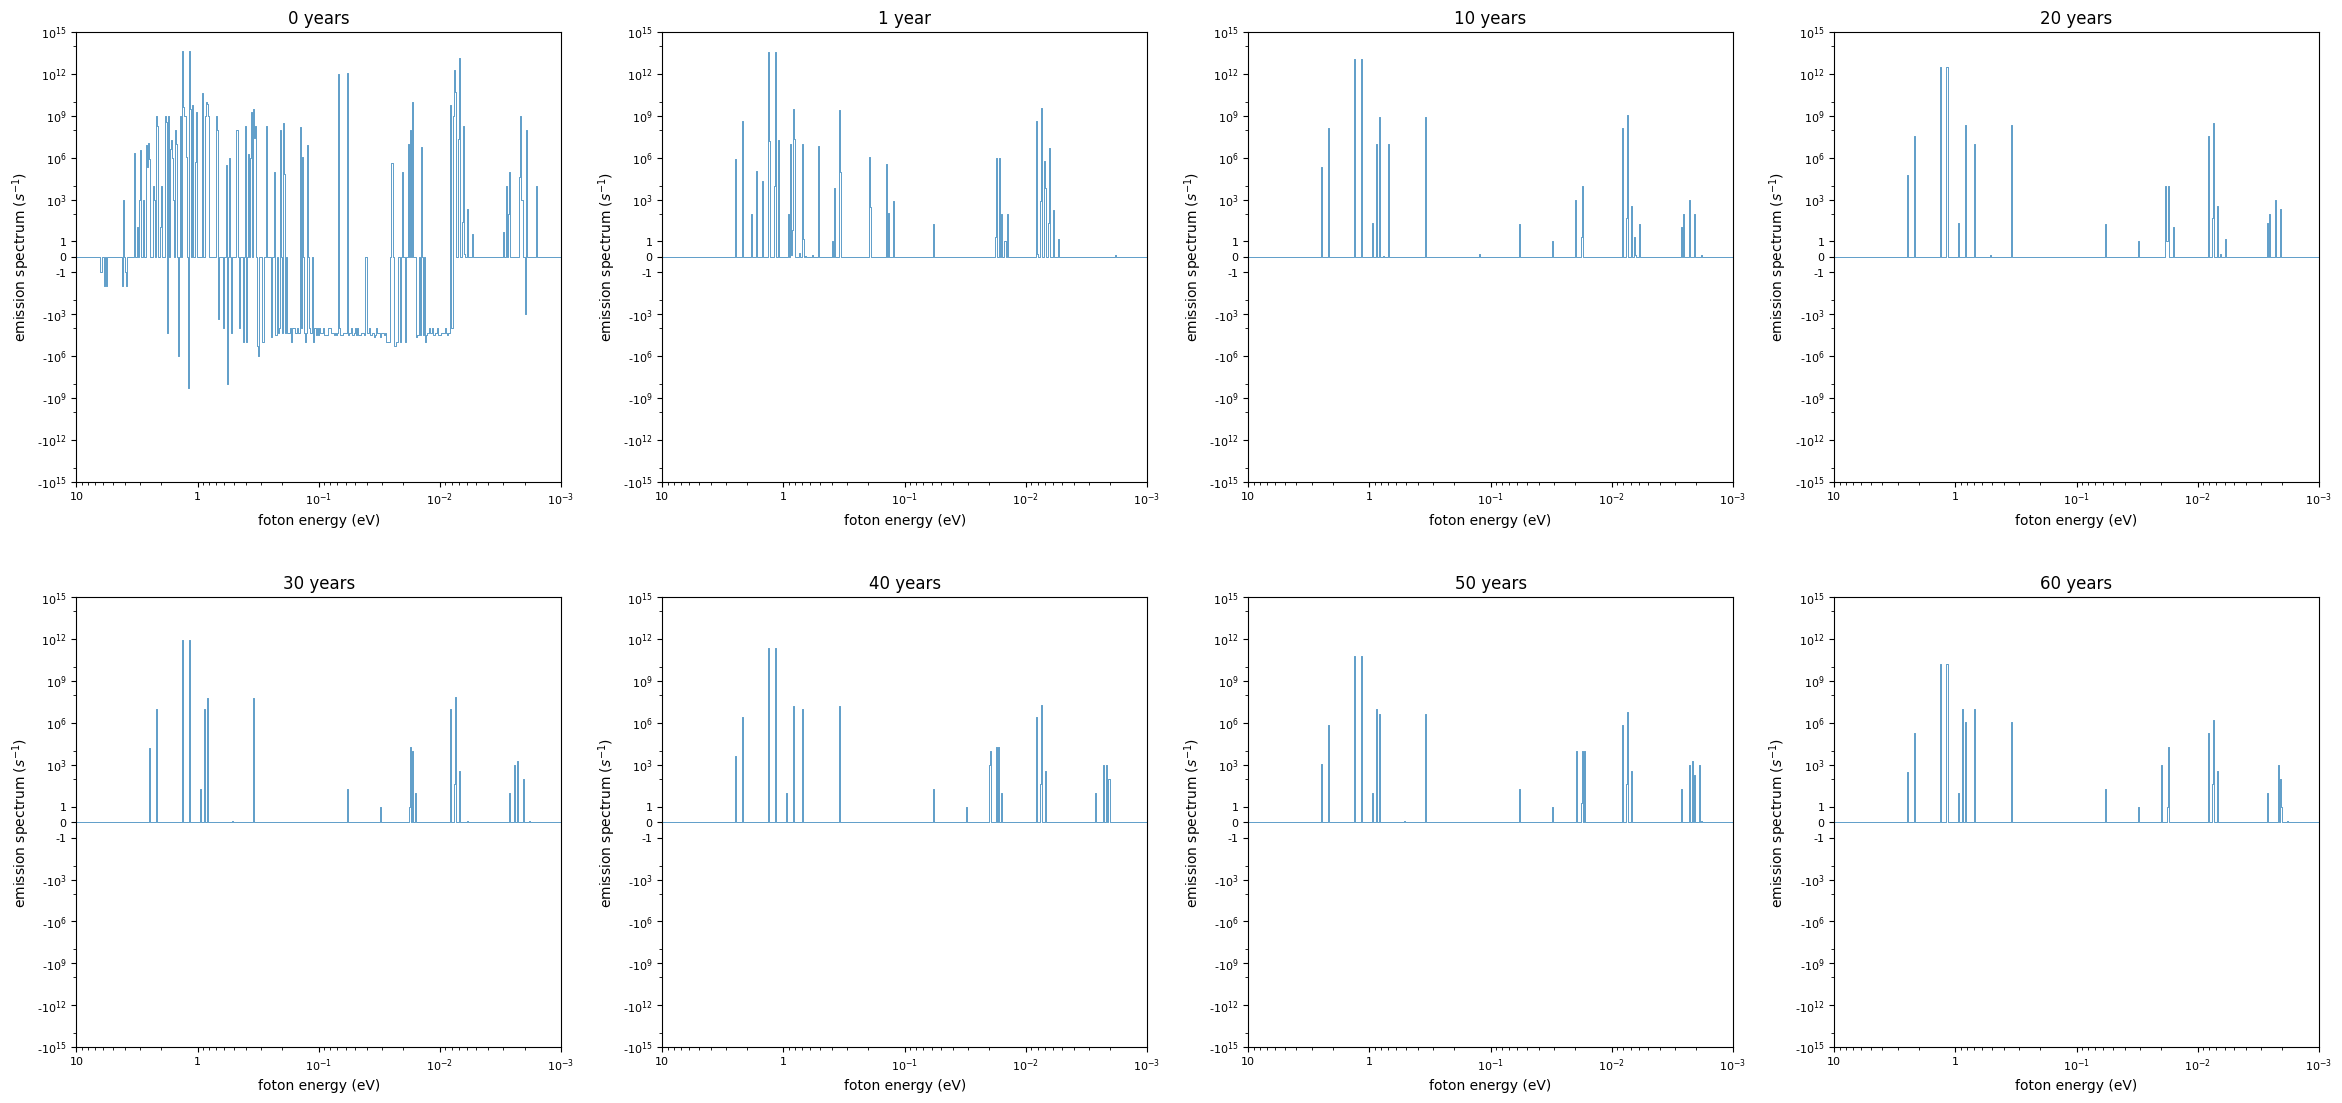

In [8]:
for ax in axes.flat:
    ax.set_ylabel(r'emission spectrum ($s^{-1}$)')
    ax.set_xlabel('foton energy (MeV)')

fig